### Introducción a Pandas con Titanic

In [202]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from patsy import dmatrices
sns.set()

In [198]:
def filtrador(df, columna, valor):
    df = df.copy()
    df[columna] = df[columna].apply(np.floor)
    return df

In [203]:
titanic = sns.load_dataset('titanic')

In [199]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [200]:
age = pd.cut(titanic['age'], range(0, 80, 5))
titanic.pivot_table('survived', ['sex', age],
                    'class', aggfunc='count').fillna(0)

class            First  Second  Third
sex    age                           
female (0, 5]      1.0     5.0   15.0
       (5, 10]     0.0     3.0    7.0
       (10, 15]    2.0     2.0    8.0
       (15, 20]   11.0     6.0   17.0
       (20, 25]   14.0    13.0   18.0
       (25, 30]    7.0    15.0   14.0
       (30, 35]   12.0    10.0    8.0
       (35, 40]   12.0     7.0    6.0
       (40, 45]    6.0     6.0    6.0
       (45, 50]    7.0     4.0    2.0
       (50, 55]    6.0     2.0    0.0
       (55, 60]    5.0     1.0    0.0
       (60, 65]    2.0     0.0    1.0
male   (0, 5]      2.0     8.0   13.0
       (5, 10]     0.0     1.0    9.0
       (10, 15]    1.0     0.0    6.0
       (15, 20]    4.0    10.0   48.0
       (20, 25]    7.0    17.0   53.0
       (25, 30]   12.0    16.0   44.0
       (30, 35]    9.0    17.0   32.0
       (35, 40]   16.0     9.0   17.0
       (40, 45]    8.0     5.0   16.0
       (45, 50]   16.0     4.0    6.0
       (50, 55]    7.0     6.0    3.0
       (55, 60]    7.0     3.0    2.0
       (60, 65]    8.0     1.0    2.0
       (65, 70]    1.0     2.0    0.0
       (70, 75]    2.0     0.0    2.0

In [183]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', index=['sex', age], columns=[ fare, 'class']).fillna(0)

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 5]                0.0  0.000000  0.800000          0.000000   
       (5, 10]               0.0  0.000000  0.000000          0.000000   
       (10, 15]              0.0  0.000000  0.714286          1.000000   
       (15, 20]              0.0  1.000000  0.615385          1.000000   
       (20, 25]              0.0  0.750000  0.428571          0.928571   
       (25, 30]              0.0  1.000000  0.600000          1.000000   
       (30, 35]              0.0  1.000000  0.333333          1.000000   
       (35, 40]              0.0  0.750000  0.000000          1.000000   
       (40, 45]              0.0  1.000000  0.000000          1.000000   
       (45, 50]              0.0  1.000000  0.000000          0.857143   
       (50, 55]              0.0  0.000000  0.000000          1.000000   
       (55, 60]              0.0  0.000000  0.000000          1.000000   
       (60, 65]              0.0  0.000000  1.000000          1.000000   
male   (0, 5]                0.0  0.000000  1.000000          1.000000   
       (5, 10]               0.0  0.000000  1.000000          0.000000   
       (10, 15]              0.0  0.000000  0.500000          1.000000   
       (15, 20]              0.0  0.142857  0.121951          0.250000   
       (20, 25]              0.0  0.000000  0.102041          0.428571   
       (25, 30]              0.0  0.000000  0.194444          0.500000   
       (30, 35]              0.0  0.250000  0.142857          0.750000   
       (35, 40]              0.0  0.000000  0.090909          0.538462   
       (40, 45]              0.0  0.500000  0.142857          0.375000   
       (45, 50]              0.0  0.000000  0.000000          0.375000   
       (50, 55]              0.0  0.000000  0.000000          0.285714   
       (55, 60]              0.0  0.000000  0.000000          0.285714   
       (60, 65]              0.0  1.000000  0.000000          0.000000   
       (65, 70]              0.0  0.000000  0.000000          0.000000   
       (70, 75]              0.0  0.000000  0.000000          0.000000   

fare                                 
class              Second     Third  
sex    age                           
female (0, 5]    1.000000  0.700000  
       (5, 10]   1.000000  0.000000  
       (10, 15]  1.000000  0.000000  
       (15, 20]  1.000000  0.000000  
       (20, 25]  1.000000  0.750000  
       (25, 30]  0.714286  0.250000  
       (30, 35]  1.000000  0.600000  
       (35, 40]  1.000000  0.500000  
       (40, 45]  0.750000  0.000000  
       (45, 50]  1.000000  0.000000  
       (50, 55]  1.000000  0.000000  
       (55, 60]  0.000000  0.000000  
       (60, 65]  0.000000  0.000000  
male   (0, 5]    1.000000  0.272727  
       (5, 10]   1.000000  0.250000  
       (10, 15]  0.000000  0.000000  
       (15, 20]  0.000000  0.142857  
       (20, 25]  0.000000  0.000000  
       (25, 30]  0.000000  0.250000  
       (30, 35]  0.111111  0.500000  
       (35, 40]  0.000000  0.000000  
       (40, 45]  0.000000  0.000000  
       (45, 50]  0.000000  0.000000  
       (50, 55]  0.000000  0.000000  
       (55, 60]  0.000000  0.000000  
       (60, 65]  0.000000  0.000000  
       (65, 70]  0.000000  0.000000  
       (70, 75]  0.000000  0.000000

In [193]:
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [194]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [195]:
clase='male'
edad=55
titanic.query('age > @edad and sex==@clase')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
94,0,3,male,59.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
152,0,3,male,55.5,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
170,0,1,male,61.0,0,0,33.5000,S,First,man,True,B,Southampton,no,True
174,0,1,male,56.0,0,0,30.6958,C,First,man,True,A,Cherbourg,no,True
232,0,2,male,59.0,0,0,13.5000,S,Second,man,True,NaN,Southampton,no,True
252,0,1,male,62.0,0,0,26.5500,S,First,man,True,C,Southampton,no,True


In [196]:
titanic = (
            titanic
            .drop(['sibsp', 'parch', 'fare', 'embarked', 'who', 'adult_male',
              'deck', 'embark_town', 'alone', 'alive'], axis=1)
            .dropna()
            .query('sex=="female" and 15 < age < 25')
         )
titanic

,survived,pclass,sex,age,class
38,0,3,female,18.0,Third
44,1,3,female,19.0,Third
49,0,3,female,18.0,Third
56,1,2,female,21.0,Second
68,1,3,female,17.0,Third
...,...,...,...,...,...
853,1,1,female,16.0,First
855,1,3,female,18.0,Third
858,1,3,female,24.0,Third
882,0,3,female,22.0,Third


Gráficos

https://www.kaggle.com/thulani96/titanic-dataset-analysis-with-seaborn

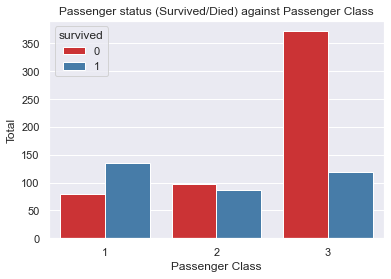

In [211]:
ax = sns.countplot(x = 'pclass', hue = 'survived', palette = 'Set1', data = titanic)
ax.set(title = 'Passenger status (Survived/Died) against Passenger Class', 
       xlabel = 'Passenger Class', ylabel = 'Total')
plt.show()

survived    0    1
sex               
female     81  233
male      468  109


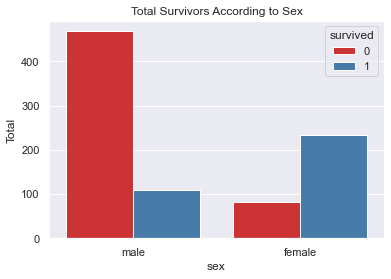

In [216]:
print(pd.crosstab(titanic["sex"],titanic['survived']))
ax = sns.countplot(x = 'sex', hue = 'survived', palette = 'Set1', data = titanic)
ax.set(title = 'Total Survivors According to Sex', xlabel = 'sex', ylabel='Total')
plt.show()

In [208]:
formula = 'survived ~ C(pclass) + C(sex) + age + sibsp  + C(embarked)' 
# create a results dictionary to hold our regression results for easy analysis later        
results = {} 

In [209]:
y,x = dmatrices(formula, data=titanic, return_type='dataframe')
# instantiate our model
model = sm.Logit(y,x)

# fit our model to the training data
res = model.fit()

# save the result for outputing predictions later
results['Logit'] = [res, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.444388
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Sat, 28 Nov 2020   Pseudo R-squ.:                  0.3414
Time:                        23:04:49   Log-Likelihood:                -316.40
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 5.992e-67
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.5423      0.474      9.583      0.000       3.613       5.471
C(pclass)[T.2]      -1.2673      0.299     -4.245      0.000      -1.852      -0.682
C(pclass)[T.3]      -2.4966      0.296     -8.422      0.000      -3.078      -1.916
C(sex)[T.male]      -2.6239      0.218    -12.060      0.000      -3.050      -2.197
C(embarked)[T.Q]    -0.8351      0.597     -1.398      0.162      -2.006       0.335
C(embarked)[T.S]    -0.4254      0.271     -1.572      0.116      -0.956       0.105
age                 -0.0436      0.008     -5.264      0.000      -0.060      -0.027
sibsp               -0.3697      0.123     -3.004      0.003      -0.611      -0.129
====================================================================================
"""